In [25]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)
import matplotlib.pyplot as plt

In [11]:
X=np.array([[1,2]]).T
y=np.array([[1,2]]).T

In [64]:
kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),

           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5)]

In [65]:
n_restarts_optimizer=10
gp1 = GaussianProcessRegressor(kernel=kernels[0], n_restarts_optimizer=n_restarts_optimizer)
gp2 = GaussianProcessRegressor(kernel=kernels[1], n_restarts_optimizer=n_restarts_optimizer)
gp3 = GaussianProcessRegressor(kernel=kernels[2], n_restarts_optimizer=n_restarts_optimizer)
gp4 = GaussianProcessRegressor(kernel=kernels[3], n_restarts_optimizer=n_restarts_optimizer)


In [66]:
gp1.fit(X, y)
gp2.fit(X, y)
gp3.fit(X, y)
gp4.fit(X, y)


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * Matern(length_scale=1, nu=1.5),
             n_restarts_optimizer=10, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [84]:
pred=np.array([list(range(20))]).T
p1=gp1.predict(pred)
p2=gp2.predict(pred)
p3=gp3.predict(pred)
p4=gp4.predict(pred)



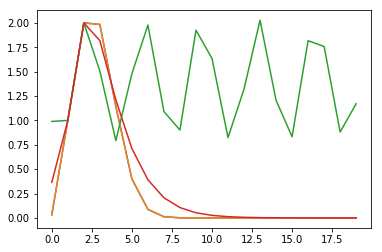

In [85]:
plt.plot(p1) 
plt.plot(p2)
plt.plot(p3) 
plt.plot(p4)

plt.show()